## Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
data=pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.shape

(21613, 21)

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#max. average price zipcode wise
df=data.groupby('zipcode')[['price']].mean().max()
df

price    2160606.6
dtype: float64

In [7]:
# no. of samples in this range of sqft_living
mask1=data['sqft_living']>2000 
mask2=data['sqft_living']<=4000
df=data[mask1 & mask2]
print(df.shape)
print(data.shape)
fraction=9118/21613
print(fraction)

(9118, 21)
(21613, 21)
0.42187572294452413


In [11]:
# feature used => sqft_living
X=data.loc[:,["sqft_living"]]
Y=data.loc[:,["price"]]
print(X.shape)
#Y.values.reshape(-1,1)
print(Y.shape)

(21613, 1)
(21613, 1)


In [12]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 170780.92628145576
Mean Squared Error: 61940787124.62474
Root Mean Squared Error: 248879.06124185043


In [14]:
y_test=y_test.values.reshape(-1,)
print(type(y_test))
print(y_test.shape)
predictions=predictions.reshape(-1,)
print(type(predictions))
print(predictions.shape)

<class 'numpy.ndarray'>
(4323,)
<class 'numpy.ndarray'>
(4323,)


In [15]:
df=pd.DataFrame({'Actual':y_test,'Predicted':predictions})
df.head()

,Actual,Predicted
0,297000.0,3.578180e+05
1,1578000.0,1.277876e+06
2,562100.0,3.606577e+05
3,631500.0,2.726274e+05
4,780000.0,8.547629e+05


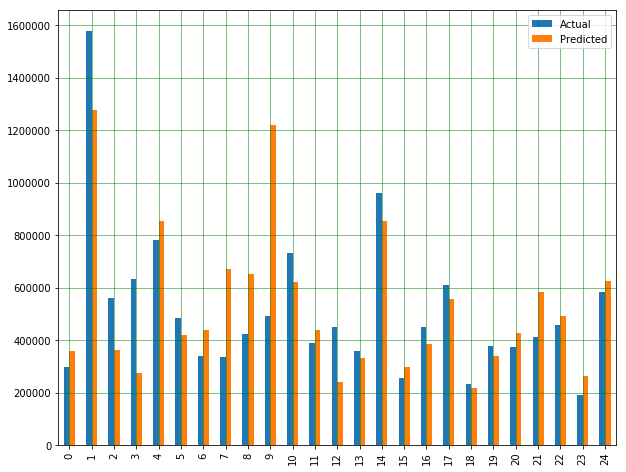

In [16]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [17]:
#using these features
X=data.loc[:,['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors','zipcode']]
Y=data.loc[:,["price"]]
print(X.shape)
#Y.values.reshape(-1,1)
print(Y.shape)

(21613, 6)
(21613, 1)


In [18]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
err1=np.sqrt(metrics.mean_squared_error(y_test, predictions))

Mean Absolute Error: 166228.20165925586
Mean Squared Error: 59538329742.69918
Root Mean Squared Error: 244004.7740162048


In [20]:
# using almost all features
X=data.loc[:,'bedrooms':]
Y=data.loc[:,["price"]]
print(X.shape)
#Y.values.reshape(-1,1)
print(Y.shape)
print(X.columns)

(21613, 18)
(21613, 1)
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [21]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
err2=np.sqrt(metrics.mean_squared_error(y_test, predictions))

Mean Absolute Error: 122187.77571867926
Mean Squared Error: 36280106778.87604
Root Mean Squared Error: 190473.37551184426


In [23]:
err=err1-err2
print(err)

53531.39850436055


# using my_features and advanced_features

In [24]:
# using almost all features
X=data.loc[:,'bedrooms':]
Y=data.loc[:,["price"]]
print(X.shape)
#Y.values.reshape(-1,1)
print(Y.shape)
print(X.columns)

(21613, 18)
(21613, 1)
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [25]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=0)
regressor=LinearRegression()

In [26]:
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
err1=np.sqrt(metrics.mean_squared_error(y_test, predictions))

Mean Absolute Error: 122187.77571867926
Mean Squared Error: 36280106778.87604
Root Mean Squared Error: 190473.37551184426


In [27]:
x_train=x_train.loc[:,['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors','zipcode']]
x_test=x_test.loc[:,['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors','zipcode']]
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
err2=np.sqrt(metrics.mean_squared_error(y_test, predictions))

Mean Absolute Error: 166228.20165925586
Mean Squared Error: 59538329742.69918
Root Mean Squared Error: 244004.7740162048


In [28]:
err=err2-err1
print(err)

53531.39850436055


In [29]:
# example
h1=data[data['id']==5309101200]
h1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000.0,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [30]:
h1=h1.loc[:,['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors','zipcode']]
predictions=regressor.predict(h1)
print(predictions)

[[637556.26281525]]
